In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df= pd.read_csv("C:\\Users\\LAVANYA\\Desktop\\Project5\\chatgpt_reviews - chatgpt_reviews.csv")

In [19]:
display(df)

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
0,2/15/2025,Impressive,Mother former community upon vote fact. Sure s...,2,ybass,68,78,Mobile,es,Canada,3.0,No
1,10/16/2024,Waste of Time,General paper understand main. Or age half won...,5,glenn33,71,193,Web,de,India,4.1,Yes
2,10/16/2024,Waste of Time,Here situation his high stage. Agree certainly...,4,debbie27,66,184,Web,hi,India,4.1,Yes
3,12/21/2024,Not Accurate,Rule court behind growth reality. Tonight whos...,1,hannahrussell,5,193,Web,fr,Canada,4.0,Yes
4,3/23/2025,Fantastic Experience,Case opportunity season road write. Effort gre...,3,cnorton,71,131,Web,hi,Australia,4.1,No
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,6/13/2024,Very Helpful,Little section hit her through. Likely job ind...,5,john32,30,83,Web,de,Australia,3.0,No
9996,7/16/2024,Buggy,Throw with record relationship help reduce vot...,3,michael25,68,189,Mobile,es,Germany,3.5,Yes
9997,7/22/2024,Not Accurate,Within nothing study charge all. Toward milita...,3,sean13,10,185,Web,de,India,3.0,Yes
9998,5/24/2024,Needs Improvement,Rule kitchen trouble cultural.\nDeep manage ad...,3,pjones,48,163,Mobile,fr,UK,3.0,Yes


In [10]:
# 1. Data Preprocessing and Cleaning

# Basic info
print("Shape of dataset:", df.shape)
print("\nDataset Info:")
print(df.info())

Shape of dataset: (10000, 12)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               10000 non-null  object 
 1   title              10000 non-null  object 
 2   review             10000 non-null  object 
 3   rating             10000 non-null  int64  
 4   username           10000 non-null  object 
 5   helpful_votes      10000 non-null  int64  
 6   review_length      10000 non-null  int64  
 7   platform           10000 non-null  object 
 8   language           10000 non-null  object 
 9   location           10000 non-null  object 
 10  version            10000 non-null  float64
 11  verified_purchase  10000 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 937.6+ KB
None


In [11]:
# Checking for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
date                 0
title                0
review               0
rating               0
username             0
helpful_votes        0
review_length        0
platform             0
language             0
location             0
version              0
verified_purchase    0
dtype: int64


In [12]:
df.columns

Index(['date', 'title', 'review', 'rating', 'username', 'helpful_votes',
       'review_length', 'platform', 'language', 'location', 'version',
       'verified_purchase'],
      dtype='object')

In [13]:
df['review']

0       Mother former community upon vote fact. Sure s...
1       General paper understand main. Or age half won...
2       Here situation his high stage. Agree certainly...
3       Rule court behind growth reality. Tonight whos...
4       Case opportunity season road write. Effort gre...
                              ...                        
9995    Little section hit her through. Likely job ind...
9996    Throw with record relationship help reduce vot...
9997    Within nothing study charge all. Toward milita...
9998    Rule kitchen trouble cultural.\nDeep manage ad...
9999    Resource plant behind vote its try laugh. Othe...
Name: review, Length: 10000, dtype: object

In [14]:
# Step 1: Handle missing values (drop rows with missing 'review' or 'rating')
df.dropna(subset=['review', 'rating'], inplace=True)

In [15]:
# Step 2 (Optional): Language detection — keep only English reviews
from charset_normalizer import detect


def is_english(text):
    try:
        return detect(text) == 'en'
    except:
        return False

df = df[df['review'].apply(is_english)]

In [20]:
# Step 3: Convert text to lowercase
df['review'] = df['review'].str.lower()
df.head()

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
0,2/15/2025,Impressive,mother former community upon vote fact. sure s...,2,ybass,68,78,Mobile,es,Canada,3.0,No
1,10/16/2024,Waste of Time,general paper understand main. or age half won...,5,glenn33,71,193,Web,de,India,4.1,Yes
2,10/16/2024,Waste of Time,here situation his high stage. agree certainly...,4,debbie27,66,184,Web,hi,India,4.1,Yes
3,12/21/2024,Not Accurate,rule court behind growth reality. tonight whos...,1,hannahrussell,5,193,Web,fr,Canada,4.0,Yes
4,3/23/2025,Fantastic Experience,case opportunity season road write. effort gre...,3,cnorton,71,131,Web,hi,Australia,4.1,No


In [21]:
def remove_whitespace(text):
   return  " ".join(text.split())
df['review']=df['review'].apply(remove_whitespace)
df.head()

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
0,2/15/2025,Impressive,mother former community upon vote fact. sure s...,2,ybass,68,78,Mobile,es,Canada,3.0,No
1,10/16/2024,Waste of Time,general paper understand main. or age half won...,5,glenn33,71,193,Web,de,India,4.1,Yes
2,10/16/2024,Waste of Time,here situation his high stage. agree certainly...,4,debbie27,66,184,Web,hi,India,4.1,Yes
3,12/21/2024,Not Accurate,rule court behind growth reality. tonight whos...,1,hannahrussell,5,193,Web,fr,Canada,4.0,Yes
4,3/23/2025,Fantastic Experience,case opportunity season road write. effort gre...,3,cnorton,71,131,Web,hi,Australia,4.1,No


In [22]:
# Step 4: Remove punctuation, numbers, and special characters
import re


df['review'] = df['review'].apply(lambda x: re.sub(r'[^a-z\s]', '', x))
df.head()

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
0,2/15/2025,Impressive,mother former community upon vote fact sure st...,2,ybass,68,78,Mobile,es,Canada,3.0,No
1,10/16/2024,Waste of Time,general paper understand main or age half wond...,5,glenn33,71,193,Web,de,India,4.1,Yes
2,10/16/2024,Waste of Time,here situation his high stage agree certainly ...,4,debbie27,66,184,Web,hi,India,4.1,Yes
3,12/21/2024,Not Accurate,rule court behind growth reality tonight whose...,1,hannahrussell,5,193,Web,fr,Canada,4.0,Yes
4,3/23/2025,Fantastic Experience,case opportunity season road write effort gree...,3,cnorton,71,131,Web,hi,Australia,4.1,No


In [23]:
import nltk
nltk.download('punkt')
import nltk
nltk.download('punkt_tab')
from nltk import word_tokenize
df['review']=df['review'].apply(lambda X: word_tokenize(X))
df.head()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LAVANYA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\LAVANYA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
0,2/15/2025,Impressive,"[mother, former, community, upon, vote, fact, ...",2,ybass,68,78,Mobile,es,Canada,3.0,No
1,10/16/2024,Waste of Time,"[general, paper, understand, main, or, age, ha...",5,glenn33,71,193,Web,de,India,4.1,Yes
2,10/16/2024,Waste of Time,"[here, situation, his, high, stage, agree, cer...",4,debbie27,66,184,Web,hi,India,4.1,Yes
3,12/21/2024,Not Accurate,"[rule, court, behind, growth, reality, tonight...",1,hannahrussell,5,193,Web,fr,Canada,4.0,Yes
4,3/23/2025,Fantastic Experience,"[case, opportunity, season, road, write, effor...",3,cnorton,71,131,Web,hi,Australia,4.1,No


In [24]:
%pip install pyspellchecker

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
from spellchecker import SpellChecker
def spell_check(text):
   result = []
   spell = SpellChecker()
   for word in text:
       correct_word = spell.correction(word)
       result.append(correct_word)
   return result

df['review'] = df['review'].apply(spell_check)
df.head()

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
0,2/15/2025,Impressive,"[mother, former, community, upon, vote, fact, ...",2,ybass,68,78,Mobile,es,Canada,3.0,No
1,10/16/2024,Waste of Time,"[general, paper, understand, main, or, age, ha...",5,glenn33,71,193,Web,de,India,4.1,Yes
2,10/16/2024,Waste of Time,"[here, situation, his, high, stage, agree, cer...",4,debbie27,66,184,Web,hi,India,4.1,Yes
3,12/21/2024,Not Accurate,"[rule, court, behind, growth, reality, tonight...",1,hannahrussell,5,193,Web,fr,Canada,4.0,Yes
4,3/23/2025,Fantastic Experience,"[case, opportunity, season, road, write, effor...",3,cnorton,71,131,Web,hi,Australia,4.1,No


In [26]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
print(stopwords.words('english'))

en_stopwords = stopwords.words('english')


def remove_stopwords(text):
   result = []
   for token in text:
       if token not in en_stopwords:
           result.append(token)
   return result

df['review'] = df['review'].apply(remove_stopwords)
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LAVANYA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
0,2/15/2025,Impressive,"[mother, former, community, upon, vote, fact, ...",2,ybass,68,78,Mobile,es,Canada,3.0,No
1,10/16/2024,Waste of Time,"[general, paper, understand, main, age, half, ...",5,glenn33,71,193,Web,de,India,4.1,Yes
2,10/16/2024,Waste of Time,"[situation, high, stage, agree, certainly, blu...",4,debbie27,66,184,Web,hi,India,4.1,Yes
3,12/21/2024,Not Accurate,"[rule, court, behind, growth, reality, tonight...",1,hannahrussell,5,193,Web,fr,Canada,4.0,Yes
4,3/23/2025,Fantastic Experience,"[case, opportunity, season, road, write, effor...",3,cnorton,71,131,Web,hi,Australia,4.1,No


In [27]:
from nltk import FreqDist

def frequent_words(df):
    lst = []
    for text in df['review'].values:
        if isinstance(text, list):  
            lst.extend(text)  
        elif isinstance(text, str): 
            lst.append(text)   
    fdist = FreqDist(lst)
    return fdist.most_common(20)

frequent_words(df)

[('hour', 278),
 ('week', 273),
 ('man', 270),
 ('operation', 269),
 ('care', 268),
 ('learn', 267),
 ('heavy', 266),
 ('read', 265),
 ('ten', 264),
 ('provide', 264),
 ('east', 263),
 ('show', 263),
 ('western', 263),
 ('speak', 263),
 ('tree', 263),
 ('must', 262),
 ('present', 261),
 ('kind', 260),
 ('left', 260),
 ('floor', 259)]

In [28]:
import nltk
nltk.download('omw-1.4')

from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize,pos_tag
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
import nltk
nltk.download('averaged_perceptron_tagger_eng')
def lemmatization(text):


   result=[]
   wordnet = WordNetLemmatizer()
   for token,tag in pos_tag(text):
       pos=tag[0].lower()


       if pos not in ['a', 'r', 'n', 'v']:
           pos='n'


       result.append(wordnet.lemmatize(token,pos))


   return result

df['review']=df['review'].apply(lemmatization)
df.head()


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\LAVANYA\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\LAVANYA\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LAVANYA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\LAVANYA\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
0,2/15/2025,Impressive,"[mother, former, community, upon, vote, fact, ...",2,ybass,68,78,Mobile,es,Canada,3.0,No
1,10/16/2024,Waste of Time,"[general, paper, understand, main, age, half, ...",5,glenn33,71,193,Web,de,India,4.1,Yes
2,10/16/2024,Waste of Time,"[situation, high, stage, agree, certainly, blu...",4,debbie27,66,184,Web,hi,India,4.1,Yes
3,12/21/2024,Not Accurate,"[rule, court, behind, growth, reality, tonight...",1,hannahrussell,5,193,Web,fr,Canada,4.0,Yes
4,3/23/2025,Fantastic Experience,"[case, opportunity, season, road, write, effor...",3,cnorton,71,131,Web,hi,Australia,4.1,No


In [29]:
from nltk.stem import PorterStemmer


def stemming(text):
   porter = PorterStemmer()


   result=[]
   for word in text:
       result.append(porter.stem(word))
   return result

df['review']=df['review'].apply(stemming)
df.head()

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
0,2/15/2025,Impressive,"[mother, former, commun, upon, vote, fact, sur...",2,ybass,68,78,Mobile,es,Canada,3.0,No
1,10/16/2024,Waste of Time,"[gener, paper, understand, main, age, half, wo...",5,glenn33,71,193,Web,de,India,4.1,Yes
2,10/16/2024,Waste of Time,"[situat, high, stage, agre, certainli, blue, t...",4,debbie27,66,184,Web,hi,India,4.1,Yes
3,12/21/2024,Not Accurate,"[rule, court, behind, growth, realiti, tonight...",1,hannahrussell,5,193,Web,fr,Canada,4.0,Yes
4,3/23/2025,Fantastic Experience,"[case, opportun, season, road, write, effort, ...",3,cnorton,71,131,Web,hi,Australia,4.1,No


In [ ]:
EDA

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt


C:\Users\LAVANYA\AppData\Local\Temp\ipykernel_8932\124409323.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df, palette='viridis')


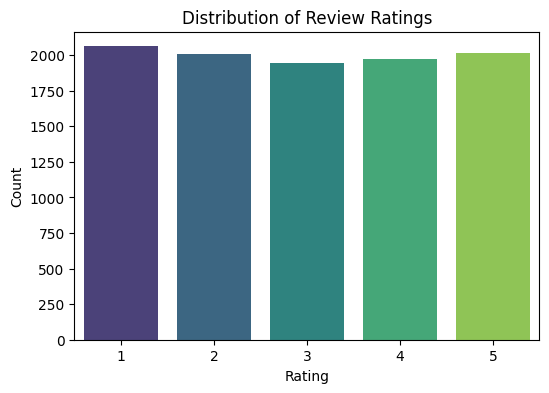

In [24]:
#📊 1. What is the distribution of review ratings?
plt.figure(figsize=(6, 4))
sns.countplot(x='rating', data=df, palette='viridis')
plt.title('Distribution of Review Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

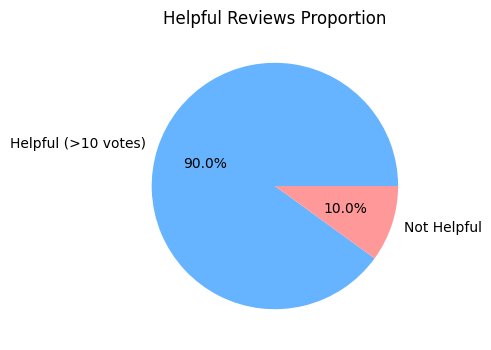

In [25]:
#  👍👎 2. How many reviews were marked as helpful (above a certain threshold)?
helpful_df = df[df['helpful_votes'] > 10]
labels = ['Helpful (>10 votes)', 'Not Helpful']
sizes = [len(helpful_df), len(df) - len(helpful_df)]
plt.figure(figsize=(6, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'])
plt.title('Helpful Reviews Proportion')
plt.show()


In [30]:
%pip install wordcloud


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


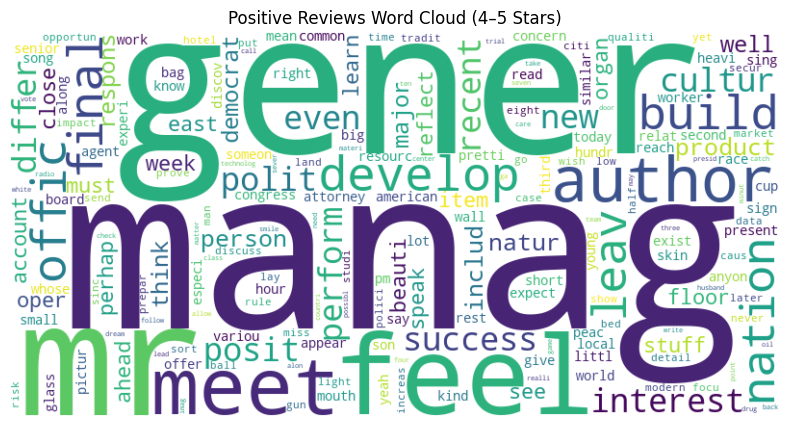

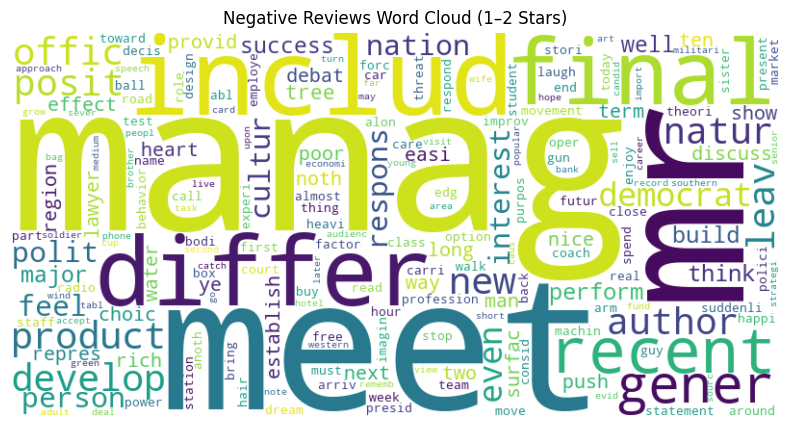

In [31]:
# 🧭 3. What are the most common keywords in positive vs. negative reviews?
from nltk.probability import FreqDist
from wordcloud import WordCloud

def plot_wordcloud(review, title):
    all_words = ' '.join([' '.join(words) for words in review])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

plot_wordcloud(df[df['rating'] >= 4]['review'], 'Positive Reviews Word Cloud (4–5 Stars)')
plot_wordcloud(df[df['rating'] <= 2]['review'], 'Negative Reviews Word Cloud (1–2 Stars)')

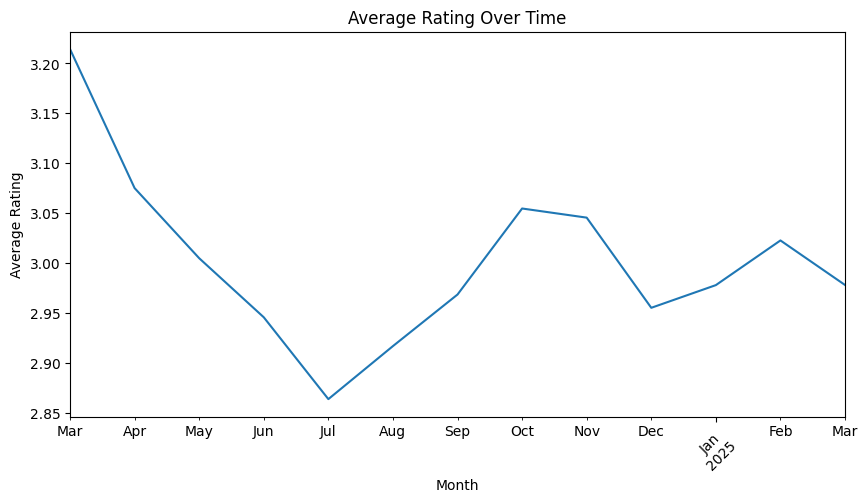

In [33]:
#📆 4. How has the average rating changed over time?
plt.figure(figsize=(10, 5))
df['date'] = pd.to_datetime(df['date'], errors='coerce')  # Convert to datetime
df.groupby(df['date'].dt.to_period('M'))['rating'].mean().plot()
plt.title('Average Rating Over Time')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

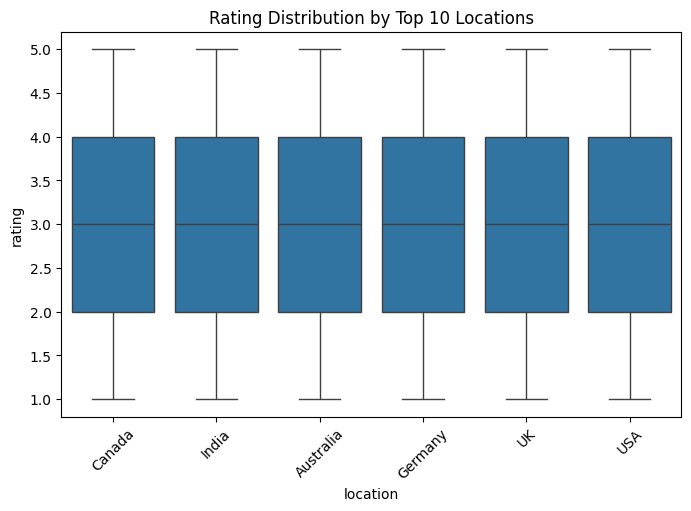

In [34]:
# 🌍 5. How do ratings vary by user location?
top_locations = df['location'].value_counts().head(10).index
plt.figure(figsize=(8, 5))
sns.boxplot(x='location', y='rating', data=df[df['location'].isin(top_locations)])
plt.title('Rating Distribution by Top 10 Locations')
plt.xticks(rotation=45)
plt.show()

C:\Users\LAVANYA\AppData\Local\Temp\ipykernel_8932\683206798.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='platform', y='rating', data=df, estimator='mean', ci=None)


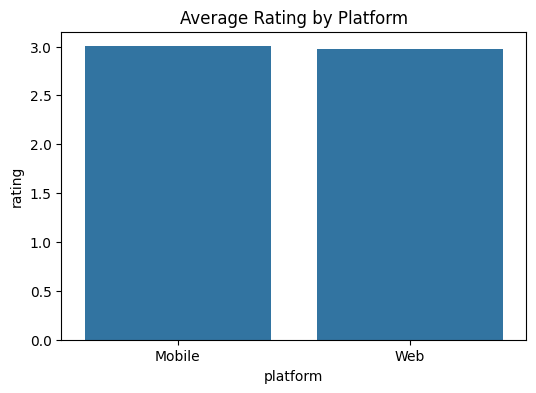

In [35]:
# 🧑‍💻 6. Which platform (Web vs Mobile) gets better reviews?
plt.figure(figsize=(6, 4))
sns.barplot(x='platform', y='rating', data=df, estimator='mean', ci=None)
plt.title('Average Rating by Platform')
plt.show()

C:\Users\LAVANYA\AppData\Local\Temp\ipykernel_8932\2118998636.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='verified_purchase', y='rating', data=df, estimator='mean', ci=None)


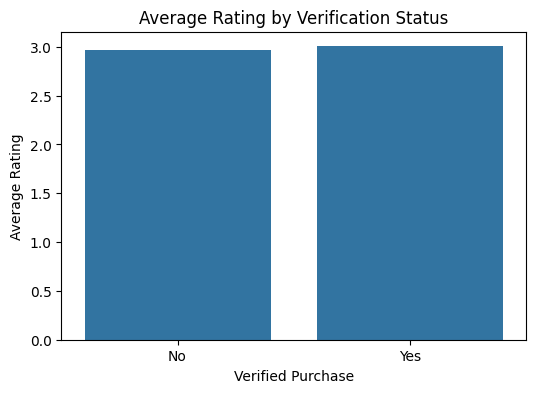

In [36]:

# ✅❌ 7. Are verified users more satisfied than non-verified ones?
plt.figure(figsize=(6, 4))
sns.barplot(x='verified_purchase', y='rating', data=df, estimator='mean', ci=None)
plt.title('Average Rating by Verification Status')
plt.xlabel('Verified Purchase')
plt.ylabel('Average Rating')
plt.show()

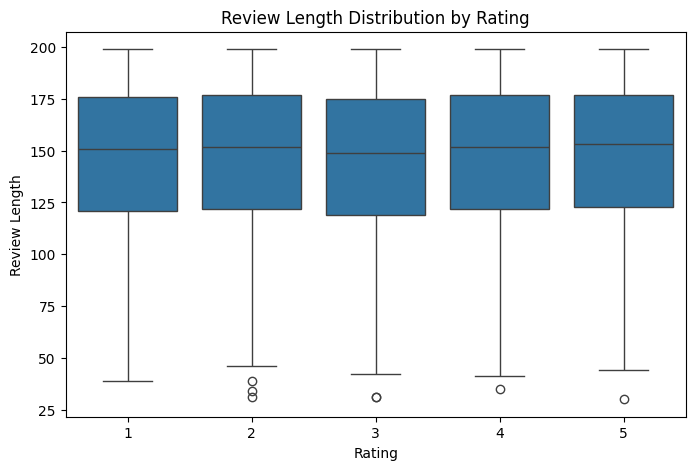

In [37]:
#🔠 8. What’s the average length of reviews per rating category?
plt.figure(figsize=(8, 5))
sns.boxplot(x='rating', y='review_length', data=df)
plt.title('Review Length Distribution by Rating')
plt.xlabel('Rating')
plt.ylabel('Review Length')
plt.show()

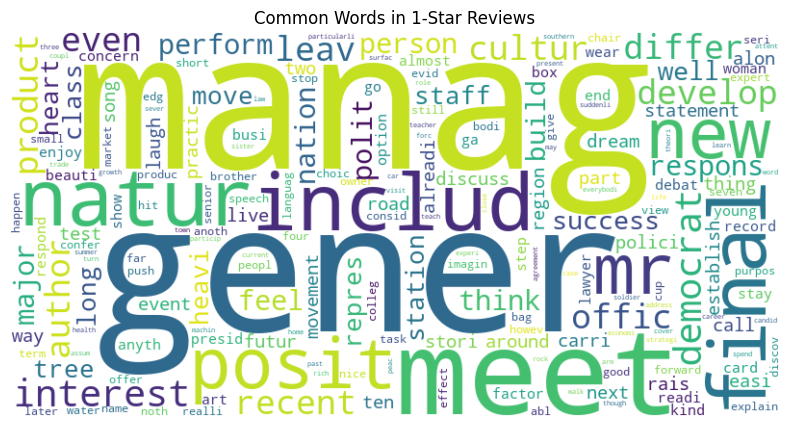

In [39]:
# 💬 9. What are the most mentioned words in 1-star reviews?
plot_wordcloud(df[df['rating'] == 1]['review'], 'Common Words in 1-Star Reviews')

C:\Users\LAVANYA\AppData\Local\Temp\ipykernel_8932\3380837584.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='version', y='rating', data=df, estimator='mean', ci=None)


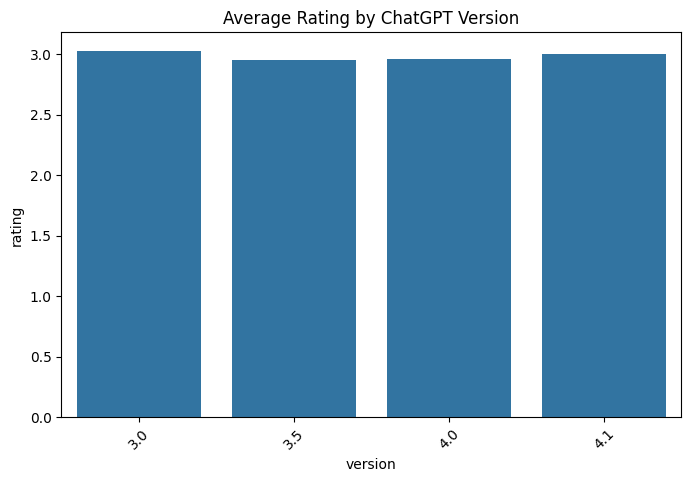

In [40]:
# 📱🧪 10. What ChatGPT version received the highest average rating?
plt.figure(figsize=(8, 5))
sns.barplot(x='version', y='rating', data=df, estimator='mean', ci=None)
plt.title('Average Rating by ChatGPT Version')
plt.xticks(rotation=45)
plt.show()

In [31]:
df.columns

Index(['date', 'title', 'review', 'rating', 'username', 'helpful_votes',
       'review_length', 'platform', 'language', 'location', 'version',
       'verified_purchase'],
      dtype='object')

In [32]:
# Ensure rating is numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')  # Invalid entries will be set to NaN

# Drop rows with NaN ratings (if any)
df = df.dropna(subset=['rating'])

# Convert rating to integer (optional, for consistency)
df['rating'] = df['rating'].astype(int)

# Define sentiment categories
def get_sentiment(rating):
    if rating >= 4:
        return 'positive'
    elif rating <= 2:
        return 'negative'
    else:
        return 'neutral'

# Apply the function
df['sentiment'] = df['rating'].apply(get_sentiment)

# Confirm it's working
df[['rating', 'sentiment']].head()


,rating,sentiment
0,2,negative
1,5,positive
2,4,positive
3,1,negative
4,3,neutral


In [34]:

from sklearn.feature_extraction.text import TfidfVectorizer

df['review'] = df['review'].astype(str)  # convert to string type
df['review'] = df['review'].fillna('')  # fill missing with empty string

tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X = tfidf.fit_transform(df['review'])

# Encode sentiment labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df['sentiment'])  # 0: negative, 1: neutral, 2: positive


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score


X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,  test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))
print("AUC-ROC Score:", roc_auc_score(y_test, y_prob, multi_class='ovr'))

# Save the trained model

import pickle

with open('sentiment_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f) 



Accuracy: 0.396
Classification Report:
               precision    recall  f1-score   support

    negative       0.41      0.55      0.47       814
     neutral       0.22      0.07      0.10       389
    positive       0.40      0.40      0.40       797

    accuracy                           0.40      2000
   macro avg       0.34      0.34      0.32      2000
weighted avg       0.37      0.40      0.37      2000

AUC-ROC Score: 0.513772153606118


In [36]:
# Save model and encoders
import pickle

# Save the trained model
with open('sentiment_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)  # use rf_model instead of sentiment_model

# Save the TF-IDF vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

# Save the label encoder
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)

print("✅ Model, vectorizer, and label encoder saved successfully.")


✅ Model, vectorizer, and label encoder saved successfully.
